In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#getting the samples
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [7]:
#getting the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
-Sex
-Smoker
-Region

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


This will give us the number of the value in each columns, mix, max valus and the percentile which will help us to get the statiscal data for the analysis.

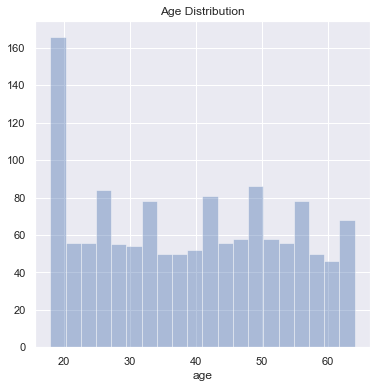

In [28]:
# checking distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'], kde=False, bins=20)
plt.title('Age Distribution')
plt.show()

We can see that the maximum age value we've in this dataset is in range of 20-25. 

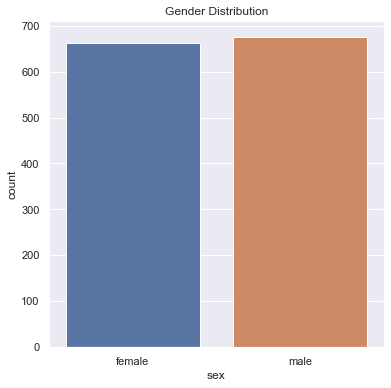

In [29]:
#checking the gender distribution in our dataset
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

We can see that the distribution is almost equal in this plot.

In [30]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

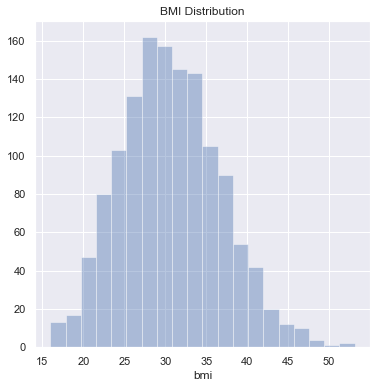

In [31]:
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'], kde=False, bins=20)
plt.title('BMI Distribution')
plt.show()

Normal BMI range is----> 18.5 to 24.9
So according to the this distribution, the number of overweight person is high in this particular dataset, which means the insurance cost we'll be high as well.

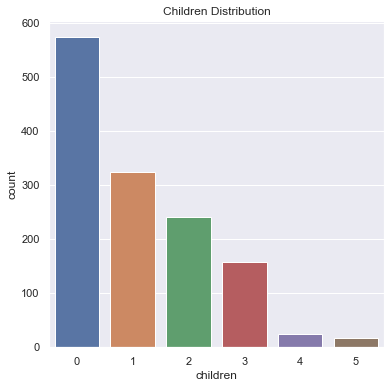

In [33]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children Distribution')
plt.show()

According to this graph the number of people who doesn't have any children is high in this dataset 

In [34]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

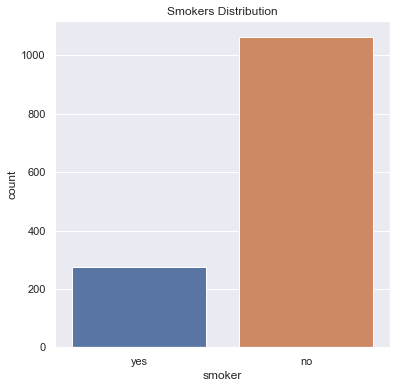

In [35]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('Smokers Distribution')
plt.show()

In [36]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

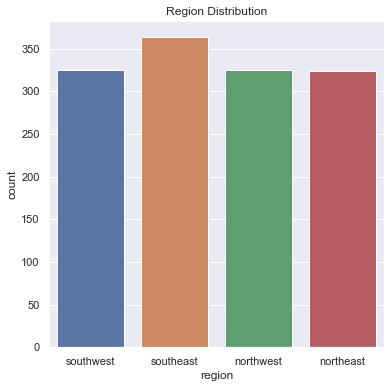

In [37]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('Region Distribution')
plt.show()

In [38]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

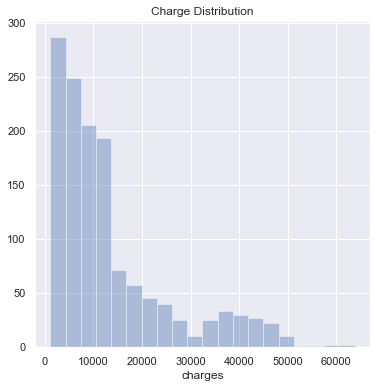

In [39]:
plt.figure(figsize=(6,6))
sns.distplot(df['charges'], kde=False, bins=20)
plt.title('Charge Distribution')
plt.show()

In [40]:
df.replace({'sex':{'male':0, 'female':1}}, inplace=True)
df.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [41]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [43]:
#Splitting the features and Traget
X=df.drop(columns='charges', axis=1)
Y=df['charges']

In [44]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [46]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Training and Testing the data

In [47]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

In [48]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Training Model

In [49]:
regressor=LinearRegression()

In [51]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [52]:
#Prediction on training data
training_data_prediction=regressor.predict(X_train)

In [56]:
r2_train= metrics.r2_score(Y_train, training_data_prediction)
print('Squared Value:' ,r2_train)

Squared Value: 0.751505643411174


In [57]:
training_data_prediction=regressor.predict(X_test)

In [58]:
r2_test= metrics.r2_score(Y_test, training_data_prediction)
print('Squared Value:' ,r2_test)

Squared Value: 0.7447273869684077


Building a Predictive System for the Cost

In [63]:
input_data= (31,1,25.74,0,1,0)
#changing the input data to numpy array
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction= regressor.predict(input_data_reshaped)
print(prediction)

print("The insurance cost in USD is", prediction[0])

[3760.0805765]
The insurance cost in USD is 3760.0805764960496
